# Ejercicios de optimización escalar

In [166]:
from sympy import *  
from sympy.plotting import plot
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["xtick.color"] = "red" 

init_session(use_latex=True) 

def iterate_solutions(solutions, derivative):
    for sol in solutions:
        fdd_val = derivative.subs(x, sol) 
        if fdd_val > 0: print(f"f({sol}) es un minimo relativo") 
        elif fdd_val < 0: print(f"f({sol}) es un maximo relativo") 
        else: print("El criterio no decide") 
        

        

IPython console for SymPy 1.9 (Python 3.10.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



**Para la siguientes funciones encuentre los puntos críticos, grafique y diga si éste se trata de un máximo o mínimo, local o global.**

$f(x)=1260+117x-9x^2$

Encontrar las soluciones para $f'(x) = 0$ 

Determinar por criterio si son máximos, mínimos locales o globales.

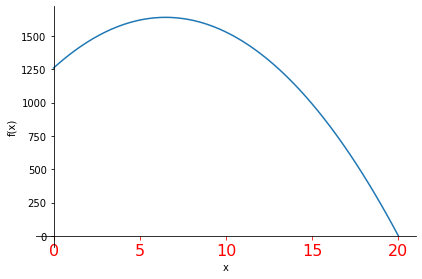

In [167]:
x = Symbol('x')
f = (1260 + 117*x - 9*x**2) 
fd = diff(f) 
fdd = diff(fd)
sols = solve(fd, x =0) 
# Crear plot 
%matplotlib inline
p = plot(f, (x, 0,20))
sols  

In [168]:
solution = sols[0] 
fdd.subs(x,solution)

La evaluación del punto crítico en la segunda derivada de la función da como resultado un número negativo, indicando que este es un máximo relativo. 

$f''(x) = -18$

$f(x)=5+x+\frac{4}{x}$, para $x>0$

In [169]:
x = Symbol('x')
f = (5 + x + (4 / x)) 
fd = diff(f) 
fdd = diff(fd)
sols = solve(fd, x =0)  
sols


Para la definición de la función, la única raíz de la primera derivada que cumple con 
$x > 0$ es $2$ 

Para determinar si es un maximo o un minimo se puede emplear el criterio de la segunda derivada. 
$f''(2)$ 

In [170]:
fdd.subs(x, sols[1])

Encontramos que $f''(2) = 1$. Esta evaluación es mayor que 0, por lo que $f(2)$ es un mínimo.

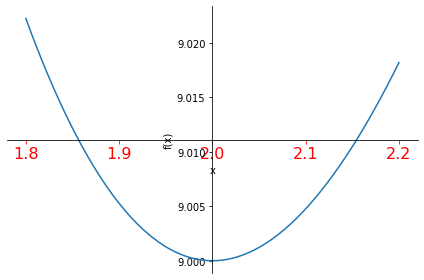

In [171]:
plot(f, (x, 1.8,2.2))

$f(x)=6-2x+\sqrt{18-2x^2}$, para $-3\leq x\leq 3$

In [172]:
x = Symbol('x')
f = (6 -2*x + sqrt(18 - 2*x**2)) 
fd = diff(f) 
fdd = diff(fd)
sols = solve(fd, x =0)  
sols

El único extremo de esta función es $ -\sqrt{6} $ 

Para determinar si es un máximo o un mínimo evaluamos este extremo en la segunda derivada.

In [173]:
fdd.subs(x, sols[0])

El resultado es 6. Se puede concluir que $ f(-\sqrt{6}) $ Es un mínimo local. 

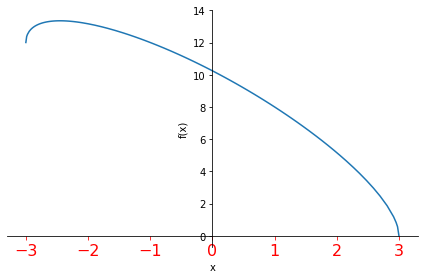

In [174]:
plot(f, (x, -3, 3))

$f(x)=\frac{1}{4}x^4+\frac{1}{3}x^3-x^2$ en el intervalo $[-3,1.7]$

In [175]:
x = Symbol('x')
f = ((1/4)*x**4 + (1/3)*x**3 - x**2) 
fd = diff(f) 
fdd = diff(fd)
sols = solve(fd, x =0)  
sols

---
**Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento.**

El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

El radio es un medio de la base 
$$ r(b)= b/2 $$

Pitágoras: $$ c^2= a^2 + b^2 $$
$$ h^2 = r^2-l^2 $$ 

Se requiere maximizar $$ 1/3 pir^2h$$ 

Sabemos que :
$$ 2l +b = 10 $$
$$ b= 10-2l $$

In [176]:
import sympy as sp
l =sp.var("l")
b = sp.var("b")

def r(b):
    return b/2

def h(b, l):
    radio = r(b)
    return sp.sqrt(l**2 - radio**2)

def volumen(b,l):
    r2= r(b)**2
    altura = h(b,l)
    return sp.pi*r2*altura/3
volumen (b,l)

In [177]:
volumen_subs= volumen(b,l).subs(b,10 -2*l)
volumen_subs

In [178]:
dvolumen = sp.diff(volumen_subs, l)
volumen_subs

In [179]:
pc = sp.solve(dvolumen, l)
pc

<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in sqrt
  return (1/12)*pi*(10 - 2*l)**2*sqrt(l**2 - 1/4*(10 - 2*l)**2)


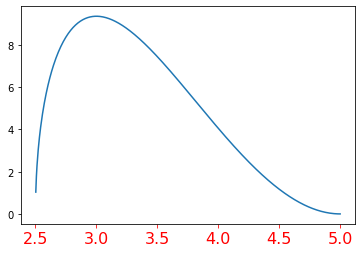

In [180]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ln = np.linspace(start=0,
                stop=5,
                num=1000)
volumen_n = sp.lambdify(l,volumen_subs,"numpy")
voln= volumen_n(ln)
plt.figure()
plt.plot(ln,voln)

Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

El paso esencial es encontrar una expresión qué maximixar. 

Para empezar, podemos definir una ecuación que representa a longitud de la barra. 

$$ l = 2h + w $$ 

Donde $l$ es la longitud total de la barra, $h$ es la altura del travesaño, y $w$ la anchura de éste. 
$$6 = 2h + w $$ 

Ahora también definamos una ecuación para el área del travesaño. 
$$A = hw$$ 

Se puede encontrar una forma de escribir la anterior ecuación en términos de una sola de las variables. Para eso retomemos la ecuación de la longitud. 

Podemos escribir la anterior expresión en términos de una sola de las variables, lo que es equivalente a despejar una de ellas. 
$$ w = 6 - 2h $$ 

Ahora podemos sustituir $w$ en la ecuación para área. 
$$ A(h) = 6h - 2h^2 $$ 

Ahora debemos de econtrar un extremo de la anterior expresión. 

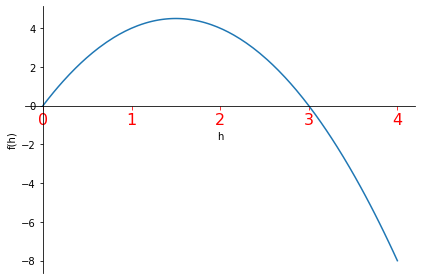

In [181]:
h = Symbol('h') 
A = (6*h - 2*h**2) 
plot(A, (h, 0, 4))

In [182]:
Ad = diff(A)
Add = diff(Ad) 

sols = solve(Ad, h = 0) 
sols

La solución es entonces $\frac{3}{2}$ 

Ahora comprobemos que este valor es máximo. 

In [183]:
Add.subs(h, sols[0])

La evaluación es negativa, por lo que este valor es un máximo.